<a href="https://colab.research.google.com/github/mdavistr-cmu/Davis-Troller_DSPN_S25/blob/main/ExerciseSubmissions/Davis-Troller_Exercise14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/CoAxLab/Data-Explorations/blob/main/book/exercises/mediation-and-moderation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 14: Mediation

This homework assignment is designed to give you practice with mediation. You won't need to load in any data for this homework -- we'll simulate data instead.

1. Simulating data 3/3
2. Visualizing data 2/2
3. Mediation Analysis 4/4
4. Reflection 1/1

---
## 1. Simulating data (3 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form:
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally:

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms.

 We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below.

 Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values.

 Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms.

In [ ]:
sample_size = 100 # How many children in data set?
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0.
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa,
                          beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {

  age <- runif(sample_size, min = age_lo, max = age_hi)

  epsilon_x <- rnorm(sample_size, mean = 0, sd = sd_x)
  x <- beta_x0 + beta_xa * age + epsilon_x

  epsilon_c <- rnorm(sample_size, mean = 0, sd = sd_c)
  c <- beta_c0 + beta_ca * age + beta_cx * x + epsilon_c

  data.frame(age = age, x = x, c = c)

}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)





,age,x,c
,<dbl>,<dbl>,<dbl>
1,98.55757,57.45397,295.9882
2,173.14407,55.92630,360.9855
3,122.19669,23.82773,240.0148
4,138.67284,73.07023,405.5324
5,146.81981,106.11407,393.0844
6,193.57507,35.47109,209.8002


---
## 2. Visualizing Data (2 point)

Load the `tidyverse` library.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


a) Plot the relationship between age and reading comprehension.

`geom_smooth()` using formula = 'y ~ x'


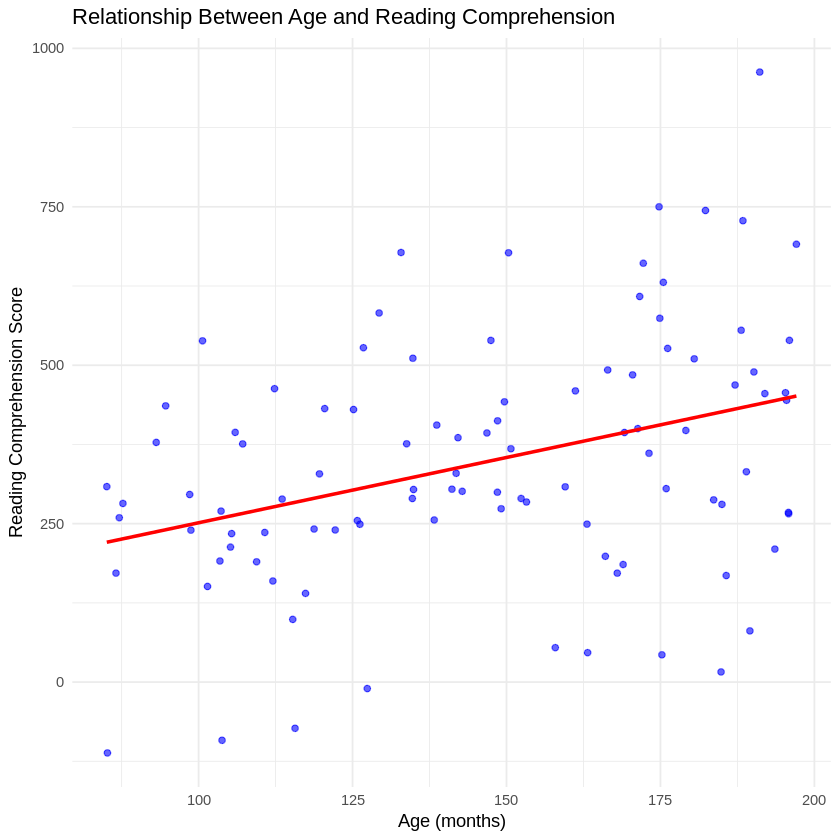

In [ ]:
ggplot(dat, aes(x = age, y = c)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +  # Add regression line
  labs(title = "Relationship Between Age and Reading Comprehension",
       x = "Age (months)",
       y = "Reading Comprehension Score") +
  theme_minimal()

b) Plot the relationship between reading experience, age, and reading comprehension.

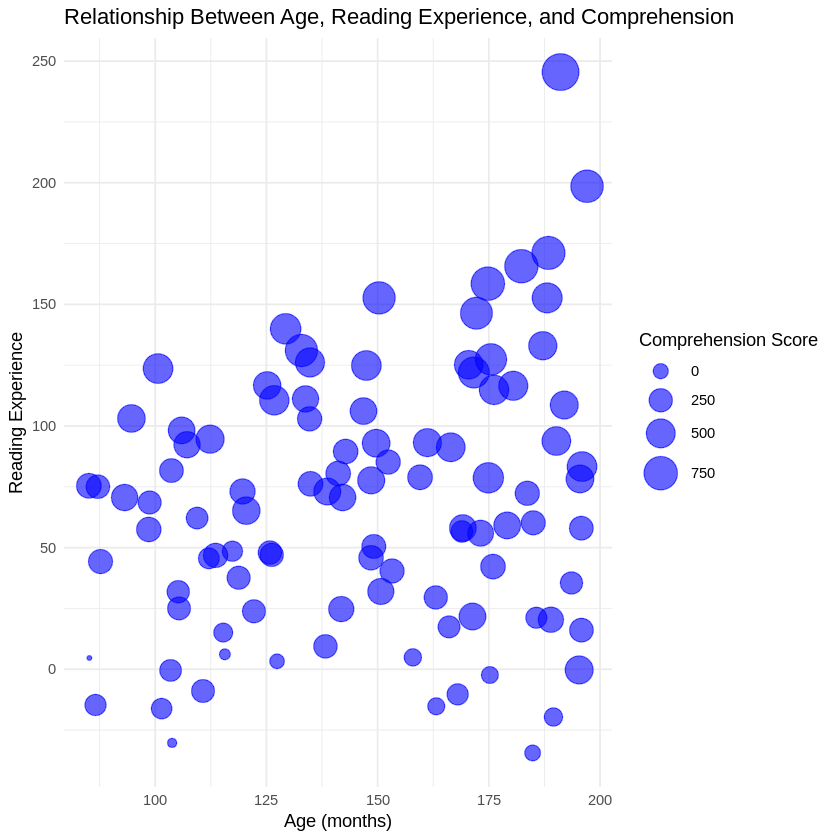

In [ ]:

ggplot(dat, aes(x = age, y = x, size = c)) +
  geom_point(alpha = 0.6, color = "blue") +
  scale_size(range = c(1, 10)) +
  labs(title = "Relationship Between Age, Reading Experience, and Comprehension",
       x = "Age (months)", y = "Reading Experience", size = "Comprehension Score") +
  theme_minimal()


---
## 3. Mediation Analysis (4 points)

Load the `mediation` library.

In [ ]:
 install.packages("mediation")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Rdpack’, ‘reformulas’, ‘lme4’




In [ ]:

library(mediation)


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.0




Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [ ]:

fitM <- lm(x ~ age, data = dat)  # mediate x based on age

fitY <- lm(c ~ x + age, data = dat)  # outcome based on age and x


fitMed <- mediate(fitM, fitY, treat = "age", mediator = "x", sims = 1000)
summary(fitMed)



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.799        0.831         2.75  <2e-16 ***
ADE               0.328       -0.162         0.81     0.2    
Total Effect      2.126        1.082         3.18  <2e-16 ***
Prop. Mediated    0.841        0.616         1.12  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


---
## 5. Reflection (1 point)
How do you interpret these results? Why do you think the analysis yielded this result?

There is a strong mediation effect seen in ACME = 1.790, p < 0.001. Age affects comprehension through reading experience.

There is a weak direct effect see in ADE = 0.344, p = 0.16. Age alone does ont significantly predict comprehension when reading experience is included in the model.

Reading experience drives comprehension improvements as 83.8% if the effect is mediated by reading experience, not just age. Therefore, future interventiosn should focus on increasing reading exposure rather than assuming as children get older their comprehension will automatically improve.

**DUE:** 5pm EST, April 1, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*